In [1]:
%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format = 'png'
matplotlib.rcParams['figure.figsize'] = (12.0, 4.0)
matplotlib.rcParams['font.size'] = 7

import matplotlib.lines as mlines
import seaborn
seaborn.set_style('darkgrid')
import logging
import importlib
importlib.reload(logging) # see https://stackoverflow.com/a/21475297/1469195
log = logging.getLogger()
log.setLevel('DEBUG')
import sys
logging.basicConfig(format='%(asctime)s %(levelname)s : %(message)s',
                     level=logging.DEBUG, stream=sys.stdout)
seaborn.set_palette('colorblind')
import os


In [2]:
import braindecode

2021-12-15 11:48:22,467 DEBUG : Creating converter from 7 to 5
2021-12-15 11:48:22,468 DEBUG : Creating converter from 5 to 7
2021-12-15 11:48:22,468 DEBUG : Creating converter from 7 to 5
2021-12-15 11:48:22,469 DEBUG : Creating converter from 5 to 7


In [3]:
from braindecode.datasets.moabb import  HGD

In [4]:
dataset = HGD([8])

Creating RawArray with float64 data, n_channels=128, n_times=2511860
    Range : 0 ... 2511859 =      0.000 ...  5023.718 secs
Ready.


/home/robintibor/anaconda3/envs/thesis/lib/python3.9/site-packages/moabb/datasets/schirrmeister2017.py:255: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T


Creating RawArray with float64 data, n_channels=128, n_times=616070
    Range : 0 ... 616069 =      0.000 ...  1232.138 secs
Ready.
654 events found
Event IDs: [1 2 3 4]
160 events found
Event IDs: [1 2 3 4]


/home/robintibor/anaconda3/envs/thesis/lib/python3.9/site-packages/moabb/datasets/schirrmeister2017.py:255: DeprecationWarning: events cannot be set directly. This warning will turn into an error after 0.24
  cnt.info["events"] = np.array(event_arr).T


In [5]:
cnt = dataset.datasets[0].raw.pick_channels(['C3', 'C4', 'Cz'])

In [6]:
#cnt = dataset.datasets[0].raw

In [7]:
cnt.get_data()[0,100:201].shape

(101,)

Text(67, -87.5, 'Loss')

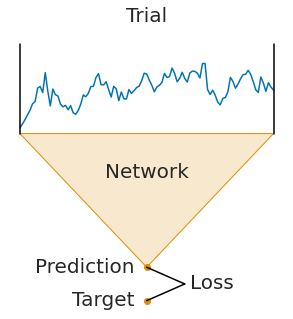

In [9]:
plt.figure(figsize=(5,5))
data = cnt.get_data()[0,100:201] * 1e6
plt.plot(data - np.mean(data))
ax = plt.gca()
plt.plot([0,0],[-20,20], color='black')
plt.plot([100,100],[-20,20], color='black')
points = [[0, -20], [50, -80], [100, -20]]
polygon = plt.Polygon(points,  facecolor=seaborn.color_palette()[1] + (0.2,), edgecolor=seaborn.color_palette()[1])
ax.add_artist(polygon)
plt.ylim(-100,22)
plt.text(50,30, "Trial", fontsize=20, ha='center')
plt.text(50,-40, "Network", fontsize=20, ha='center')
plt.plot(50,-80, ls='', marker='o', color=seaborn.color_palette()[1])
plt.text(45,-80, "Prediction", fontsize=20, ha='right', va='center')
plt.plot(50,-95, ls='', marker='o')
plt.text(45,-95, "Target", fontsize=20, ha='right', va='center')
plt.axis('off')

plt.plot([50,65],[-80, -87.5], color='black')
plt.plot([50,65],[-95, -87.5], color='black')
plt.text(67,-87.5, "Loss", fontsize=20, ha='left', va='center')

(-5.0, 105.0, -100.0, 22.0)

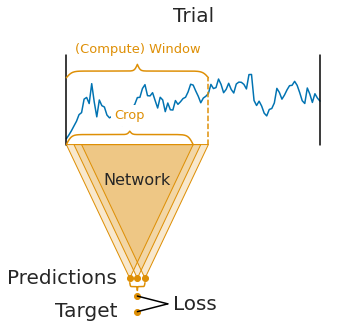

In [10]:
plt.figure(figsize=(5,5))
data = cnt.get_data()[0,100:201] * 1e6
plt.plot(data - np.mean(data))
ax = plt.gca()
plt.plot([0,0],[-20,20], color='black')
plt.plot([100,100],[-20,20], color='black')
points = [[0, -20], [25, -80], [50, -20]]
polygon = plt.Polygon(points,  facecolor=seaborn.color_palette()[1] + (0.2,), edgecolor=seaborn.color_palette()[1])
ax.add_artist(polygon)
points = [[3, -20], [28, -80], [53, -20]]
polygon = plt.Polygon(points,  facecolor=seaborn.color_palette()[1] + (0.2,), edgecolor=seaborn.color_palette()[1])
ax.add_artist(polygon)
points = [[6, -20], [31, -80], [56, -20]]
polygon = plt.Polygon(points,  facecolor=seaborn.color_palette()[1] + (0.2,), edgecolor=seaborn.color_palette()[1])
ax.add_artist(polygon)
plt.plot(25,-80, ls='', marker='o', color=seaborn.color_palette()[1])
plt.plot(28,-80, ls='', marker='o', color=seaborn.color_palette()[1])
plt.plot(31,-80, ls='', marker='o', color=seaborn.color_palette()[1])
plt.ylim(-100,22)
plt.text(50,35, "Trial", fontsize=20, ha='center')
plt.text(28,-38, "Network", fontsize=16, ha='center')
plt.text(20,-80, "Predictions", fontsize=20, ha='right', va='center')
plt.plot(28,-95, ls='', marker='o')
plt.text(20,-95, "Target", fontsize=20, ha='right', va='center')

# from https://stackoverflow.com/a/20308475/1469195
def range_brace(x_min, x_max, mid=0.75, 
                beta1=50.0, beta2=100.0, height=1, 
                initial_divisions=11, resolution_factor=1.5):
    NP = np
    # determine x0 adaptively values using second derivitive
    # could be replaced with less snazzy:
    #   x0 = NP.arange(0, 0.5, .001)
    x0 = NP.array(())
    tmpx = NP.linspace(0, 0.5, initial_divisions)
    tmp = beta1**2 * (NP.exp(beta1*tmpx)) * (1-NP.exp(beta1*tmpx)) / NP.power((1+NP.exp(beta1*tmpx)),3)
    tmp += beta2**2 * (NP.exp(beta2*(tmpx-0.5))) * (1-NP.exp(beta2*(tmpx-0.5))) / NP.power((1+NP.exp(beta2*(tmpx-0.5))),3)
    for i in range(0, len(tmpx)-1):
        t = int(NP.ceil(resolution_factor*max(NP.abs(tmp[i:i+2]))/float(initial_divisions)))
        x0 = NP.append(x0, NP.linspace(tmpx[i],tmpx[i+1],t))
    x0 = NP.sort(NP.unique(x0)) # sort and remove dups
    # half brace using sum of two logistic functions
    y0 = mid*2*((1/(1.+NP.exp(-1*beta1*x0)))-0.5)
    y0 += (1-mid)*2*(1/(1.+NP.exp(-1*beta2*(x0-0.5))))
    # concat and scale x
    x = NP.concatenate((x0, 1-x0[::-1])) * float((x_max-x_min)) + x_min
    y = NP.concatenate((y0, y0[::-1])) * float(height)
    return (x,y)


x,y = range_brace(0, 50, height=6)
ax.plot(x, y-20,'-', color=seaborn.color_palette()[1])

ax.annotate('Crop',  xy=(25, -10), xycoords='data', 
            fontsize=13, ha='center', va='bottom', color=seaborn.color_palette()[1],
            bbox=dict(boxstyle='square', fc='white', ec='None',))

x,y = range_brace(0, 56, height=6, mid=0.5, beta1=50)
ax.plot(x, y+10,'-', color=seaborn.color_palette()[1])
plt.plot([56,56], [-20,10], ls='--', color=seaborn.color_palette()[1])
ax.annotate('(Compute) Window',  xy=(28, 20), xycoords='data', 
            fontsize=13, ha='center', va='bottom', color=seaborn.color_palette()[1],
            bbox=dict(boxstyle='square', fc='white', ec='None',))
x,y = range_brace(25, 31, height=3.5, mid=0.5, beta1=50)
ax.plot(x, -y-82,'-', color=seaborn.color_palette()[1])
plt.plot(28,-88, ls='', marker='o',  color=seaborn.color_palette()[1])

plt.plot([28,40],[-88, -91.5], color='black')
plt.plot([28,40],[-95, -91.5], color='black')
plt.text(42,-91.5, "Loss", fontsize=20, ha='left', va='center')
plt.axis('off')

(-5.0, 105.0, -100.0, 22.0)

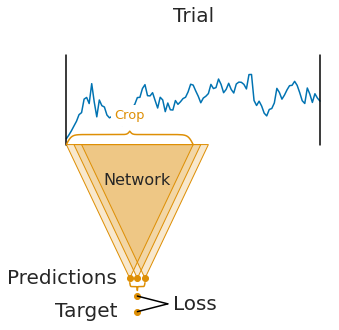

In [36]:
plt.figure(figsize=(5,5))
data = cnt.get_data()[0,100:201] * 1e6
plt.plot(data - np.mean(data))
ax = plt.gca()
plt.plot([0,0],[-20,20], color='black')
plt.plot([100,100],[-20,20], color='black')
points = [[0, -20], [25, -80], [50, -20]]
polygon = plt.Polygon(points,  facecolor=seaborn.color_palette()[1] + (0.2,), edgecolor=seaborn.color_palette()[1])
ax.add_artist(polygon)
points = [[3, -20], [28, -80], [53, -20]]
polygon = plt.Polygon(points,  facecolor=seaborn.color_palette()[1] + (0.2,), edgecolor=seaborn.color_palette()[1])
ax.add_artist(polygon)
points = [[6, -20], [31, -80], [56, -20]]
polygon = plt.Polygon(points,  facecolor=seaborn.color_palette()[1] + (0.2,), edgecolor=seaborn.color_palette()[1])
ax.add_artist(polygon)
plt.plot(25,-80, ls='', marker='o', color=seaborn.color_palette()[1])
plt.plot(28,-80, ls='', marker='o', color=seaborn.color_palette()[1])
plt.plot(31,-80, ls='', marker='o', color=seaborn.color_palette()[1])
plt.ylim(-100,22)
plt.text(50,35, "Trial", fontsize=20, ha='center')
plt.text(28,-38, "Network", fontsize=16, ha='center')
plt.text(20,-80, "Predictions", fontsize=20, ha='right', va='center')
plt.plot(28,-95, ls='', marker='o')
plt.text(20,-95, "Target", fontsize=20, ha='right', va='center')

# from https://stackoverflow.com/a/20308475/1469195
def range_brace(x_min, x_max, mid=0.75, 
                beta1=50.0, beta2=100.0, height=1, 
                initial_divisions=11, resolution_factor=1.5):
    NP = np
    # determine x0 adaptively values using second derivitive
    # could be replaced with less snazzy:
    #   x0 = NP.arange(0, 0.5, .001)
    x0 = NP.array(())
    tmpx = NP.linspace(0, 0.5, initial_divisions)
    tmp = beta1**2 * (NP.exp(beta1*tmpx)) * (1-NP.exp(beta1*tmpx)) / NP.power((1+NP.exp(beta1*tmpx)),3)
    tmp += beta2**2 * (NP.exp(beta2*(tmpx-0.5))) * (1-NP.exp(beta2*(tmpx-0.5))) / NP.power((1+NP.exp(beta2*(tmpx-0.5))),3)
    for i in range(0, len(tmpx)-1):
        t = int(NP.ceil(resolution_factor*max(NP.abs(tmp[i:i+2]))/float(initial_divisions)))
        x0 = NP.append(x0, NP.linspace(tmpx[i],tmpx[i+1],t))
    x0 = NP.sort(NP.unique(x0)) # sort and remove dups
    # half brace using sum of two logistic functions
    y0 = mid*2*((1/(1.+NP.exp(-1*beta1*x0)))-0.5)
    y0 += (1-mid)*2*(1/(1.+NP.exp(-1*beta2*(x0-0.5))))
    # concat and scale x
    x = NP.concatenate((x0, 1-x0[::-1])) * float((x_max-x_min)) + x_min
    y = NP.concatenate((y0, y0[::-1])) * float(height)
    return (x,y)



x,y = range_brace(0, 50, height=6)
ax.plot(x, y-20,'-', color=seaborn.color_palette()[1])

ax.annotate('Crop',  xy=(25, -10), xycoords='data', 
            fontsize=13, ha='center', va='bottom', color=seaborn.color_palette()[1],
            bbox=dict(boxstyle='square', fc='white', ec='None',))

x,y = range_brace(0, 56, height=6, mid=0.5, beta1=50)
#ax.plot(x, y+10,'-', color=seaborn.color_palette()[1])
#plt.plot([56,56], [-20,10], ls='--', color=seaborn.color_palette()[1])
#ax.annotate('(Compute) Window',  xy=(28, 20), xycoords='data', 
#            fontsize=13, ha='center', va='bottom', color=seaborn.color_palette()[1],
#            bbox=dict(boxstyle='square', fc='white', ec='None',))
x,y = range_brace(25, 31, height=3.5, mid=0.5, beta1=50)
ax.plot(x, -y-82,'-', color=seaborn.color_palette()[1])
plt.plot(28,-88, ls='', marker='o',  color=seaborn.color_palette()[1])

plt.plot([28,40],[-88, -91.5], color='black')
plt.plot([28,40],[-95, -91.5], color='black')
plt.text(42,-91.5, "Loss", fontsize=20, ha='left', va='center')
plt.axis('off')